In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import os
import io
from selenium.webdriver.common.keys import Keys
import time
import urllib.request
from requests_html import HTMLSession

# Web scrapping

In [2]:
years=list(range(1990,2022))

In [3]:
url_start='https://www.basketball-reference.com/awards/awards_{}.html'

In [4]:
for year in years:
    url=url_start.format(year)
    data=requests.get(url)
    
    with open('mvp/{}.html'.format(year), 'w+') as f:
        f.write(data.text)

In [5]:
with open('mvp/1991.html') as f:
    page=f.read()

In [6]:
soup=BeautifulSoup(page,'html.parser')

In [7]:
soup.find('tr', class_='over_header').decompose()

In [8]:
mvp_table=soup.find(id='mvp')

In [9]:
mvp_1991=pd.read_html(str(mvp_table))[0]

In [10]:
mvp_1991

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
5,6,Clyde Drexler,28,POR,1.0,75.0,960,0.078,82,34.8,21.5,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209
6,7,Kevin Johnson,24,PHO,0.0,32.0,960,0.033,77,36.0,22.2,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220
7,8,Dominique Wilkins,31,ATL,0.0,29.0,960,0.030,81,38.0,25.9,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177
8,9T,Larry Bird,34,BOS,0.0,25.0,960,0.026,60,38.0,19.4,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140
9,9T,Terry Porter,27,POR,0.0,25.0,960,0.026,81,32.9,17.0,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235


In [11]:
dfs=[]
for year in years:
    with open('mvp/{}.html'.format(year)) as f:
        page=f.read()
    soup=BeautifulSoup(page,'html.parser')
    soup.find('tr', class_='over_header').decompose()
    mvp_table=soup.find(id='mvp')
    mvp=pd.read_html(str(mvp_table))[0]
    mvp['Year']=(year)
    dfs.append(mvp)

In [12]:
dfs

[   Rank           Player  Age   Tm  First  Pts Won  Pts Max  Share   G    MP  \
 0     1    Magic Johnson   30  LAL   27.0    636.0      920  0.691  79  37.2   
 1     2  Charles Barkley   26  PHI   38.0    614.0      920  0.667  79  39.1   
 2     3   Michael Jordan   26  CHI   21.0    564.0      920  0.613  82  39.0   
 3     4      Karl Malone   26  UTA    2.0    214.0      920  0.233  82  38.1   
 4     5    Patrick Ewing   27  NYK    1.0    162.0      920  0.176  82  38.6   
 5     6   David Robinson   24  SAS    2.0    102.0      920  0.111  82  36.6   
 6     7  Hakeem Olajuwon   27  HOU    1.0     64.0      920  0.070  82  38.1   
 7     8     Tom Chambers   30  PHO    0.0     12.0      920  0.013  81  37.6   
 8     9    John Stockton   27  UTA    0.0      9.0      920  0.010  78  37.4   
 9   10T       Larry Bird   33  BOS    0.0      5.0      920  0.005  75  39.3   
 10  10T    Buck Williams   29  POR    0.0      5.0      920  0.005  82  34.2   
 11   12    Clyde Drexler   

In [13]:
mvps=pd.concat(dfs)

In [14]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,37.2,...,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270,1990
1,2,Charles Barkley,26,PHI,38.0,614.0,920,0.667,79,39.1,...,11.5,3.9,1.9,0.6,0.600,0.217,0.749,17.3,0.269,1990
2,3,Michael Jordan,26,CHI,21.0,564.0,920,0.613,82,39.0,...,6.9,6.3,2.8,0.7,0.526,0.376,0.848,19.0,0.285,1990
3,4,Karl Malone,26,UTA,2.0,214.0,920,0.233,82,38.1,...,11.1,2.8,1.5,0.6,0.562,0.372,0.762,15.9,0.245,1990
4,5,Patrick Ewing,27,NYK,1.0,162.0,920,0.176,82,38.6,...,10.9,2.2,1.0,4.0,0.551,0.250,0.775,13.5,0.205,1990


In [15]:
mvps.to_csv('mvps.csv')

In [16]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [17]:
driver = webdriver.Chrome(executable_path="/Users/eddy/documents/chromedriver")

<ipython-input-17-a776e300f2dd>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="/Users/eddy/documents/chromedriver")


In [18]:
year=1991
url = player_stats_url.format(year)
data = requests.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

html=driver.page_source
with open("player/{}.html".format(year), "w+", encoding='utf-32') as f:
    f.write(html)

In [19]:
for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    html=driver.page_source
    with io.open("player/{}.html".format(year), "w+", encoding='utf-32') as f:
        f.write(html)

In [20]:
dfs = []
for year in years:
    with io.open("player/{}.html".format(year), encoding='utf-32') as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'lxml')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="div_per_game_stats")[0]
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    dfs.append(player)

In [21]:
players=pd.concat(dfs)

In [22]:
players.reset_index()

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Mark Acres,C,27,ORL,80,50,21.1,1.7,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,1,2,Michael Adams,PG,27,DEN,79,74,34.1,5.0,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,2,3,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,3,4,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,4,5,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18517,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18518,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18519,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [23]:
players.to_csv("players.csv")

In [24]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [25]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+", encoding='utf-8') as f:
        f.write(data.text)

In [26]:
dfs = []
for year in years:
    with open("team/{}.html".format(year), encoding='utf-8') as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)

In [27]:
teams = pd.concat(dfs)

In [28]:
teams.tail()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans
17,17,55,.236,25.0,108.8,116.7,-7.50,2021,Houston Rockets


In [29]:
teams.to_csv("teams.csv")

# EDA 

In [30]:
mvps = pd.read_csv("mvps.csv")

In [31]:
#Taking the columns that are not present in the All player stats data
mvps=mvps[['Player','Year','Pts Won','Pts Max','Share']]

In [32]:
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Magic Johnson,1990,636.0,920,0.691
1,Charles Barkley,1990,614.0,920,0.667
2,Michael Jordan,1990,564.0,920,0.613
3,Karl Malone,1990,214.0,920,0.233
4,Patrick Ewing,1990,162.0,920,0.176
...,...,...,...,...,...
483,Russell Westbrook,2021,5.0,1010,0.005
484,Ben Simmons,2021,3.0,1010,0.003
485,James Harden,2021,1.0,1010,0.001
486,LeBron James,2021,1.0,1010,0.001


In [33]:
players=pd.read_csv('players.csv')

In [34]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Mark Acres,C,27,ORL,80,50,21.1,1.7,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,1,2,Michael Adams,PG,27,DEN,79,74,34.1,5.0,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,2,3,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,3,4,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,4,5,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18517,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18518,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18519,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [35]:
del players["Unnamed: 0"]

In [36]:
del players["Rk"]

In [37]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [38]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
7,Greg Anderson,PF,25,MIL,60,28,21.5,3.7,7.2,.507,...,1.9,4.4,6.2,0.4,0.5,0.9,1.3,2.9,8.8,1990
485,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
486,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
487,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
488,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991
944,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1889,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
2388,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2858,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
3425,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997


In [39]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [40]:
players

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Year                                                        
A.C. Green     1990 146       A.C. Green  PF  26  LAL  82  82  33.0  4.7   
               1991 641       A.C. Green  PF  27  LAL  82  21  26.4  3.1   
               1992 1110      A.C. Green  PF  28  LAL  82  53  35.4  4.7   
               1993 1569      A.C. Green  PF  29  LAL  82  55  34.4  4.6   
               1994 2056      A.C. Green  PF  30  PHO  82  55  34.5  5.7   
...                                  ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002 6572  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003 7072  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004 7653  Željko Rebrača   C  31  ATL  24   2  11.4  1.4   
               2005 8253  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006 8847  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                           FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                   ...                                      
A.C. Green     1990 146    9.8  .478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4   
               1991 641    6.6  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
               1992 1110   9.8  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
               1993 1569   8.6  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
               1994 2056  11.3  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
...                        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 6572   5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 7072   4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 7653   3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 8253   4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 8847   3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  Year  
Player         Year                        
A.C. Green     1990 146   2.5  12.9  1990  
               1991 641   1.4   9.1  1991  
               1992 1110  1.7  13.6  1992  
               1993 1569  1.8  12.8  1993  
               1994 2056  1.7  14.7  1994  
...                       ...   ...   ...  
Željko Rebrača 2002 6572  2.6   6.9  2002  
               2003 7072  2.6   6.6  2003  
               2004 7653  2.2   3.8  2004  
               2005 8253  2.2   5.8  2005  
               2006 8847  2.0   4.7  2006  

[14471 rows x 30 columns]

In [41]:
players.index = players.index.droplevel()

In [42]:
players.index = players.index.droplevel()

In [43]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
146,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990
641,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1110,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1569,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
2056,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
7072,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7653,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
8253,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [44]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [45]:
combined.isnull().sum()

Player         0
Pos            0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%           51
3P             0
3PA            0
3P%         2102
2P             0
2PA            0
2P%           85
eFG%          51
FT             0
FTA            0
FT%          468
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
Year           0
Pts Won    13983
Pts Max    13983
Share      13983
dtype: int64

In [46]:
#We fill every nan value to 0 because those people didnt attempt any shots.
combined= combined.fillna(0)

In [47]:
teams=pd.read_csv('teams.csv')

In [48]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers*
1,1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics*
2,2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks*
3,3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
5,5,17,65,.207,36.0,100.1,108.0,-7.82,1990,New Jersey Nets
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1990,Central Division
7,7,59,23,.720,—,104.3,98.3,5.41,1990,Detroit Pistons*
8,8,55,27,.671,4.0,109.5,106.2,2.74,1990,Chicago Bulls*
9,9,44,38,.537,15.0,106.0,106.8,-1.06,1990,Milwaukee Bucks*


In [49]:
teams = teams[~teams["W"].str.contains("Division")].copy()

In [50]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [51]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers
1,1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics
2,2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks
3,3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat
...,...,...,...,...,...,...,...,...,...,...
1058,13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks
1059,14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies
1060,15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
1061,16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [52]:
nicknames = {}
with open("nickname.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [53]:
combined["Team"] = combined["Tm"].map(nicknames)

In [54]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns


In [55]:
train = combined.merge(teams, how="outer",on=["Team", "Year"])

In [56]:
train

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,.470,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,.548,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,.500,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,.470,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14467,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14468,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14469,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45


In [57]:
del train["Unnamed: 0"]

In [58]:
train.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [59]:
train = train.apply(pd.to_numeric, errors='ignore')

In [60]:
train["GB"] = pd.to_numeric(train["GB"].str.replace("—","0"))

In [61]:
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [62]:
train.to_csv("player_mvp_stats.csv")

In [63]:
stats=pd.read_csv('player_mvp_stats.csv')

# Data analysis 

In [64]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74
1,1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74
2,2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74
3,3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74
4,4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,14466,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14467,14467,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14468,14468,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14469,14469,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [65]:
del stats['Unnamed: 0']

<AxesSubplot:>

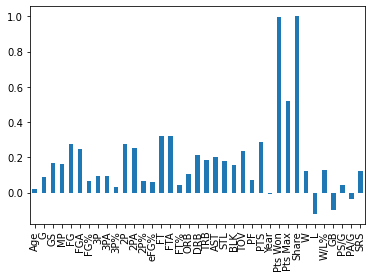

In [66]:
stats.corr()["Share"].plot.bar()

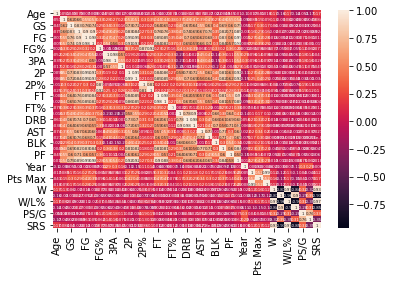

In [67]:
correlation  = sb.heatmap(stats.corr(), annot=True, annot_kws={'size': 4})

# Machine learning predictions

In [68]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [69]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
              'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
              'W', 'L', 'W/L%','GB', 'PS/G', 'PA/G', 'SRS']

In [70]:
train = stats[~(stats["Year"] == 2021)]
test = stats[stats["Year"] == 2021]

In [103]:
#Ridge regression
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [72]:
reg.fit(train[predictors],train["Share"])

Ridge(alpha=0.1)

In [73]:
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [74]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [75]:
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
655,Nikola Jokić,0.961,0.156961
8791,Joel Embiid,0.580,0.165563
3707,Stephen Curry,0.449,0.144508
10102,Giannis Antetokounmpo,0.345,0.207509
1403,Chris Paul,0.138,0.074250
11288,Luka Dončić,0.042,0.151183
7613,Damian Lillard,0.038,0.118380
3592,Julius Randle,0.020,0.089650
3587,Derrick Rose,0.010,0.034915
11649,Rudy Gobert,0.008,0.095510


In [76]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.0026655545495450172

In [77]:
combination["Share"].value_counts()

0.000    525
0.001      3
0.042      1
0.580      1
0.038      1
0.449      1
0.008      1
0.961      1
0.345      1
0.010      1
0.003      1
0.020      1
0.138      1
0.005      1
Name: Share, dtype: int64

In [78]:
combination=combination.sort_values("Share", ascending=False)
combination['Rk']=list(range(1,combination.shape[0]+1))

In [79]:
combination.head(10)

,Player,Share,predictions,Rk
655,Nikola Jokić,0.961,0.156961,1
8791,Joel Embiid,0.580,0.165563,2
3707,Stephen Curry,0.449,0.144508,3
10102,Giannis Antetokounmpo,0.345,0.207509,4
1403,Chris Paul,0.138,0.074250,5
11288,Luka Dončić,0.042,0.151183,6
7613,Damian Lillard,0.038,0.118380,7
3592,Julius Randle,0.020,0.089650,8
3587,Derrick Rose,0.010,0.034915,9
11649,Rudy Gobert,0.008,0.095510,10


In [80]:
combination=combination.sort_values("predictions", ascending=False)
combination['Predicted_Rk']=list(range(1,combination.shape[0]+1))

In [81]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
10102,Giannis Antetokounmpo,0.345,0.207509,4,1
8791,Joel Embiid,0.580,0.165563,2,2
655,Nikola Jokić,0.961,0.156961,1,3
11288,Luka Dončić,0.042,0.151183,6,4
3792,LeBron James,0.001,0.147904,15,5
3707,Stephen Curry,0.449,0.144508,3,6
4260,James Harden,0.001,0.141579,13,7
4263,Kevin Durant,0.000,0.141250,531,8
12088,Zion Williamson,0.000,0.130844,251,9
6211,Jimmy Butler,0.000,0.121428,442,10


In [82]:
#Because of the ranking we use the error metric avg precision 
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [83]:
ap = find_ap(combination)

In [84]:
ap

0.7636363636363636

In [85]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors],train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [86]:
sum(aps) / len(aps)

0.7272737929038741

In [87]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [88]:
add_ranks(all_predictions[1])

,Player,Share,predictions,Predicted_Rk,Rk,Diff
10761,Michael Jordan,0.986,0.171569,5,1,-4
10025,David Robinson,0.508,0.203413,1,2,1
7499,Anfernee Hardaway,0.319,0.105140,11,3,-8
5054,Hakeem Olajuwon,0.211,0.186749,3,4,1
10764,Scottie Pippen,0.200,0.067692,20,5,-15
...,...,...,...,...,...,...
2066,Dale Davis,0.000,0.010121,150,424,274
10030,Sean Elliott,0.000,0.010161,149,425,276
10028,Greg Anderson,0.000,0.010290,148,426,278
4998,Alton Lister,0.000,0.010302,147,427,280


In [89]:
#To make the efficient 
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [90]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [92]:
mean_ap

0.7272737929038741

In [93]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1238,Jason Kidd,0.712,0.031839,44,2,-42
5293,Steve Nash,0.839,0.035427,41,1,-40
5311,Steve Nash,0.739,0.053256,35,1,-34
13081,Joakim Noah,0.258,0.048653,36,4,-32
8683,Peja Stojaković,0.228,0.037904,33,4,-29
5326,Steve Nash,0.785,0.072789,21,2,-19
4768,Tim Hardaway,0.207,0.063037,18,4,-14
6881,Kobe Bryant,0.291,0.077387,14,4,-10
5374,Carmelo Anthony,0.393,0.083840,12,3,-9
1171,Gary Payton,0.372,0.077920,11,3,-8


# Diagnosing model performance

In [94]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1238,Jason Kidd,0.712,0.031839,44,2,-42
5293,Steve Nash,0.839,0.035427,41,1,-40
5311,Steve Nash,0.739,0.053256,35,1,-34
13081,Joakim Noah,0.258,0.048653,36,4,-32
8683,Peja Stojaković,0.228,0.037904,33,4,-29
5326,Steve Nash,0.785,0.072789,21,2,-19
4768,Tim Hardaway,0.207,0.063037,18,4,-14
6881,Kobe Bryant,0.291,0.077387,14,4,-10
5374,Carmelo Anthony,0.393,0.083840,12,3,-9
1171,Gary Payton,0.372,0.077920,11,3,-8


In [95]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.058645,eFG%
18,0.031297,DRB
28,0.030190,W/L%
10,0.019589,2P
17,0.019316,ORB
21,0.012507,STL
15,0.011205,FTA
22,0.010668,BLK
20,0.007494,AST
7,0.007409,3P


In [96]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [101]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [102]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.768,0.0,110.7,103.9,6.74,1.446394,0.524403,1.101744,1.430189,1.129657
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,0.470,...,0.768,0.0,110.7,103.9,6.74,1.737915,1.716226,1.377180,0.953459,6.777943
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,0.548,...,0.768,0.0,110.7,103.9,6.74,2.365807,1.716226,1.652616,1.430189,1.129657
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,0.500,...,0.768,0.0,110.7,103.9,6.74,0.168185,0.095346,0.413154,1.191824,0.000000
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,0.470,...,0.768,0.0,110.7,103.9,6.74,0.583042,0.190692,0.550872,0.238365,0.000000


In [98]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [99]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [100]:
mean_ap

0.7311604829039632

In [112]:
#Random forest model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, random_state=1, min_samples_split=5)

In [113]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [114]:
mean_ap, aps, all_predictions = backtest(stats, rf, years[28:], predictors + ["NPos", "NTm"])

In [115]:
mean_ap

0.7544534050179211

In [116]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)

In [117]:
mean_ap

0.7810173160173159

In [118]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [119]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [121]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)

In [122]:
sc.transform(stats[predictors])

array([[-0.18870692,  1.14479671,  1.91219717, ...,  0.14580349,
         0.36331702,  0.09903226],
       [ 0.28483646,  0.94637034,  1.74166049, ...,  0.54051438,
        -0.03930623,  4.41319635],
       [ 0.28483646,  1.06542616,  1.8439825 , ...,  0.93522526,
         0.36331702,  0.09903226],
       ...,
       [-0.42547861,  0.03360899, -0.47531637, ...,  0.1711726 ,
         1.30666647, -0.36604318],
       [-1.84610874,  0.15266482,  0.27504503, ..., -0.97469358,
         0.23105687, -0.26660384],
       [-0.42547861,  1.06542616,  1.8439825 , ...,  0.1711726 ,
        -0.41430888,  1.02610763]])